In [1]:
PATH_TO_STORE_EXPERIMENTS = "data\\rl_training"

## Define RL Pipeline structure

In [2]:
#from automl.base_configurations.environment.cart_pole import dqn_sb3 as base_rl_configuration
from automl.base_configurations.environment.cart_pole import ppo_sb3 as base_rl_configuration


rl_pipeline_config = base_rl_configuration.config_dict()

In [3]:
print(rl_pipeline_config)

{'__type__': <class 'automl.rl.rl_pipeline.RLPipelineComponent'>, 'name': 'RLPipelineComponent', 'input': {'device': 'cuda', 'environment': (<class 'automl.rl.environment.gymnasium_env.GymnasiumEnvironmentWrapper'>, {'environment': 'CartPole-v1'}), 'agents_input': {'policy': (<class 'automl.rl.policy.stochastic_policy.StochasticPolicy'>, {'model': (<class 'automl.ml.models.neural_model.FullyConnectedModelSchema'>, {'hidden_layers': 3, 'hidden_size': 64})})}, 'rl_trainer': (<class 'automl.rl.trainers.rl_trainer_component.RLTrainerComponent'>, {'name': 'RLTrainerComponent', 'default_trainer_class': <class 'automl.rl.trainers.agent_trainer_ppo.AgentTrainerPPO'>, 'limit_total_steps': 100000.0, 'predict_optimizations_to_do': True, 'agents_trainers_input': {'optimization_interval': 256, 'learner': (<class 'automl.rl.learners.ppo_learner.PPOLearner'>, {'lamda_gae': 0.8, 'critic_model': (<class 'automl.ml.models.neural_model.FullyConnectedModelSchema'>, {'hidden_layers': 2, 'hidden_size': 64, 

In [4]:
#experiment_name = "dqn_sb3_cartpole"
#experiment_name = "dqn_sb3_cartpole_ppo"

experiment_name = "ppo_cartpole"

### Change Environment

In [5]:
environment = rl_pipeline_config["input"]["environment"]
environment_input = environment[1]

#environment_input["render_mode"] = "human"

## Hyperparameters

### Base Model

In [6]:
LOAD_MODEL = True

In [7]:
rl_pipeline_input = rl_pipeline_config["input"]

rl_trainer_tuple = rl_pipeline_input["rl_trainer"]
rl_trainer_input = rl_trainer_tuple[1]

agents_input = rl_pipeline_input["agents_input"]

policy_tuple = agents_input["policy"]
policy_input = policy_tuple[1]

agents_trainers_input = rl_trainer_input["agents_trainers_input"]

In [8]:
learner_tuple = agents_trainers_input["learner"]
learner_input = learner_tuple[1]

optimizer_tuple = learner_input["optimizer"]
optimizer_input = optimizer_tuple[1]

In [9]:
import os

if LOAD_MODEL:

    #base_model_path = 'data\\models\\sb3_CartPole_dqn\\sb3_CartPole_dqn_perturbed_0_10'
    #base_model_path = 'data\\models\\sb3_CartPole_dqn\\sb3_CartPole_dqn_perturbed_5_50'
    base_model_path = 'data\\models\\sb3_CartPole_ppo\\sb3_CartPole_ppo_gaussian_0_0.8_0.9'

    #base_model_path = 'data\\models\\FC_CartPole_ppo\\FC_CartPole_ppo'
    
    from automl.utils.json_utils.shape_json_utils import CustomSpaceJsonEncoderDecoder
    
    model_name = os.path.basename(base_model_path)
    
    experiment_name = f"{experiment_name}\\{model_name}"
    
    rl_pipeline_input = rl_pipeline_config["input"]
    
    policy_input["model"] = base_model_path


In [10]:
learner_input["critic_model"] = 'data\\models\\sb3_CartPole_ppo_critic\\sb3_CartPole_ppo_critic'

In [11]:
#rl_trainer_input["limit_total_steps"] = 90000

#rl_trainer_input.pop("limit_total_steps", None)

#rl_trainer_input["num_episodes"] = 4000


In [12]:
#agents_trainers_input["learning_start_step_delay"] = 5000
#agents_trainers_input["learning_start_ep_delay"] = 150

In [13]:
#agents_trainers_input["optimization_interval"] = 2048
#agents_trainers_input["times_to_learn"] = 1

In [14]:


#optimizer_input["clip_grad_norm"] = 0.1
#optimizer_input["clip_grad_value"] = 0.1
#optimizer_tuple = learner_input["learning_rate"] = 0.0012

## Gen RL Pipeline

In [15]:

from automl.rl.rl_pipeline import RLPipelineComponent
from automl.utils.json_utils.json_component_utils import gen_component_from

rl_pipeline : RLPipelineComponent = gen_component_from(rl_pipeline_config)

In [16]:
rl_pipeline.pass_input({"base_directory" : PATH_TO_STORE_EXPERIMENTS,
                        "artifact_relative_directory" : experiment_name,
                        "create_new_directory" : True})

experiment_path = rl_pipeline.get_artifact_directory()

print(f"Experiment path: {experiment_path}")

Experiment path: data\rl_training\ppo_cartpole\sb3_CartPole_ppo_gaussian_0_0.8_0.9_37


## Do the training

In [17]:
from automl.loggers.global_logger import activate_global_logger

activate_global_logger(rl_pipeline.get_artifact_directory())

In [18]:
rl_pipeline.run()

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
Users of this version of Gym should be able to simply replace 'import gym' with 'import gymnasium as gym' in the vast majority of cases.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.
c:\Users\rgoncalo\anaconda3\envs\AIPython\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\rgoncalo\anaconda3\envs\AIPython\Lib\site-packages\stable_baselines3\common\save_util.py:167: UserWarning: Could not deserialize object learning_rate. Consider using `custom_objects` argument to replace this object.
Exception:

{}

### Save configuration

In [19]:
#rl_pipeline.save_configuration(save_exposed_values=True)
from automl.basic_components.state_management import save_state


save_state(rl_pipeline, save_definition=True)

## See Results

In [20]:
AGGREGATE_NUMBER = 10

In [21]:

from automl.loggers.result_logger import RESULTS_FILENAME, ResultLogger

results_directory = f"{experiment_path}\\RLTrainerComponent"
    
results_logger = ResultLogger(input={
                                        "results_filename" : RESULTS_FILENAME,
                                        "base_directory" : results_directory,
                                        "artifact_relative_directory" : '',
                                        "create_new_directory" : False
                            })

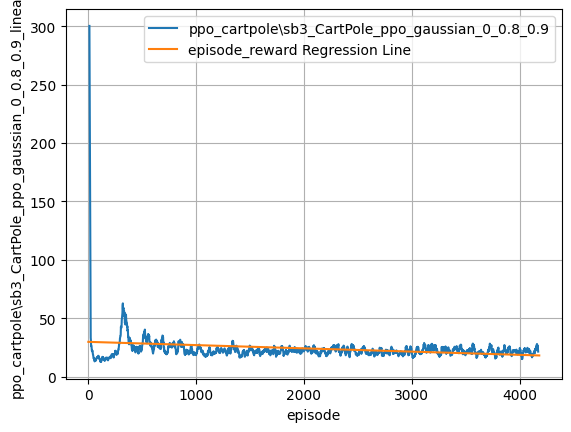

In [22]:
#results_logger.plot_graph(x_axis='episode', y_axis=[('total_reward', name)], to_show=False)
results_logger.plot_confidence_interval(x_axis='episode', y_column='episode_reward',show_std=False, to_show=False, y_values_label=experiment_name, aggregate_number=AGGREGATE_NUMBER)
results_logger.plot_linear_regression(x_axis='episode', y_axis='episode_reward', to_show=False, y_label=experiment_name + '_linear')